# Do priors matter??

Inspired by https://twitter.com/rlmcelreath/status/1701165078949581182/photo/1

TASK 1: Use `scipy.stats` to generate four distributions:
- a standard normal with mean 0, variance 1
- a standard normal with mean 10, variance 1
- a student's with 2 degrees of freedom centered on 0
- a student's with 2 degrees of freedom centered on 10

Plot all the distributions.


TASK 2: Create a function that takes two arguments: (1) a prior distribution (as a numpy array), (2) a likelihood distribution (same), calculates the posterior distributions, and plots the prior (with a black dashed line), likelihood (black solid line), and posterior (red line). Normalize each distribution before calculating the prior and plotting so that the peak is at the same height (for optimal visibility).

TASK 3: Pass to the function each combination of prior and likelihood between the four distributions you creted: normal-normal, t-t, normal-t, t-normal.

Your should end up with a plot of the posterior linelihood and prior in the same plot for each of the four posterior distributions (4 plots). EACH PLOT SHOULD BE FOLLOWED BY A CAPTION DESCRIBING THE WHAT THE WHY AND THE "WOW"



In [1]:
#these are all the imports you need
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math

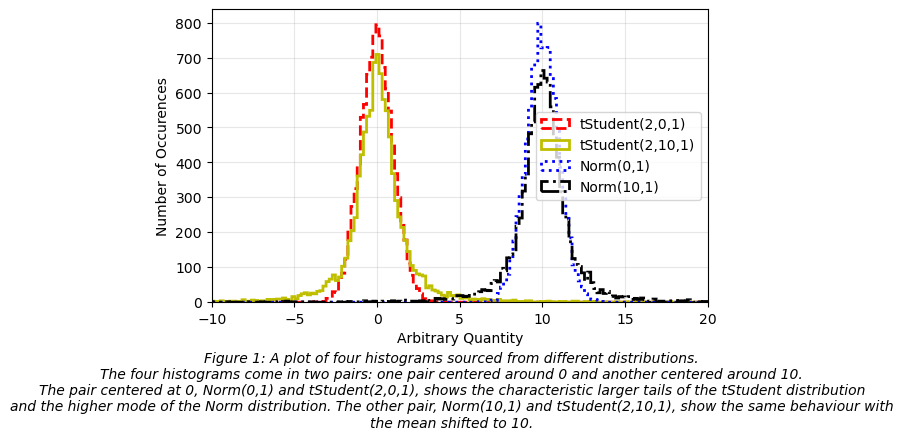

In [2]:
np.random.seed(0)
sample_size = 10**4

Norm_0 = stats.norm.rvs(loc=0, scale=1, size=sample_size)
Norm_10 = stats.norm.rvs(loc=10, scale=1, size=sample_size)
tStudent_0 = stats.t.rvs(2, loc=0, scale=1, size=sample_size)
tStudent_10 = stats.t.rvs(2, loc=10, scale=1, size=sample_size)

# Graphing
fignum = 0
fignum += 1
plt.figure(num=fignum)
data_list = [Norm_0, Norm_10, tStudent_0, tStudent_10]
x_min = np.min(np.concat(data_list))
x_max = np.max(np.concat(data_list))
bin_size = np.linspace(x_min,x_max, math.ceil(sample_size**0.75))
# I'm colorblind so I use linestyles when possible because of my wierd color choices
plt.hist(Norm_0,      bins=bin_size, histtype='step', linewidth=2, color='r', linestyle='--');
plt.hist(tStudent_0,  bins=bin_size, histtype='step', linewidth=2, color='y', linestyle='-');
plt.hist(Norm_10,     bins=bin_size, histtype='step', linewidth=2, color='b', linestyle=':');
plt.hist(tStudent_10, bins=bin_size, histtype='step', linewidth=2, color='k', linestyle='-.');

plt.xlim([-10,20]) # 10 stdev away from centers
plt.xlabel('Arbitrary Quantity')
plt.ylabel('Number of Occurences')
plt.legend([
    'tStudent(2,0,1)',
    'tStudent(2,10,1)',
    'Norm(0,1)',
    'Norm(10,1)',
    ])

plt.grid(True, alpha=0.3)
figstring = (
    "A plot of four histograms sourced from different distributions.\n"
    "The four histograms come in two pairs: one pair centered around 0 and another centered around 10.\n"
    "The pair centered at 0, Norm(0,1) and tStudent(2,0,1), shows the characteristic larger tails of the tStudent distribution\n"
    "and the higher mode of the Norm distribution. The other pair, Norm(10,1) and tStudent(2,10,1), show the same behaviour with\n"
    "the mean shifted to 10."
)
plt.figtext(.5, 0.01, f'Figure {fignum}: {figstring}', ha='center', fontsize=10, style='italic')
plt.subplots_adjust(bottom=0.27)



In [3]:
# assuming prior and likelihood come in the form of 2d arrays 2xn where n is the number of samples
# I also assume the support of the likelihoods and priors are the same
def posterior(prior, likelihood):

  # Get support
  support = prior[0,:] # just use the support of the prior array and assume it's the same for both

  # prior data processing
  prior_probs = prior[1,:]
  normalized_prior = prior_probs / np.sum(prior_probs)

  # likelihood data processing
  likelihood_probs = likelihood[1,:]
  normalized_likelihood = likelihood_probs / np.sum(likelihood_probs)
  this_posterior = normalized_prior * normalized_likelihood

  # Posterior calc
  normalized_posterior = this_posterior / np.sum(this_posterior)
  
  #Plotting
  plt.plot(support, normalized_prior,      linewidth=2, color='k', linestyle='--')
  plt.plot(support, normalized_likelihood, linewidth=2, color='k', linestyle='-')
  plt.plot(support, normalized_posterior,  linewidth=2, color='r', linestyle='-')
  plt.xlabel('Arbitrary Quantity')
  plt.ylabel('Probability')


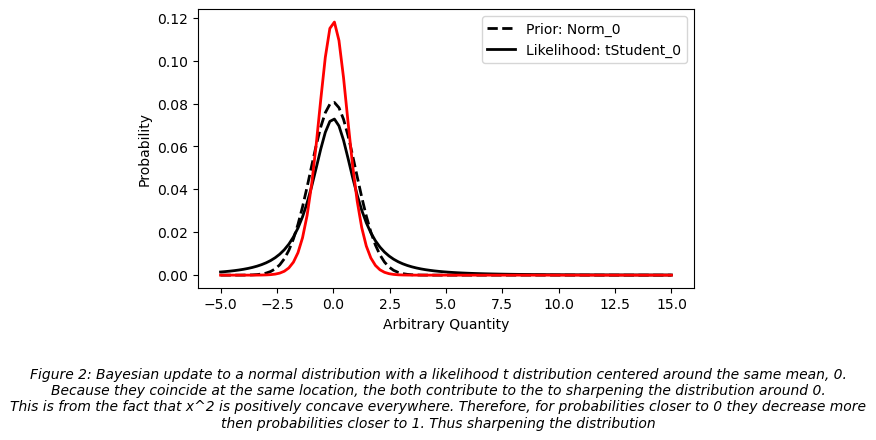

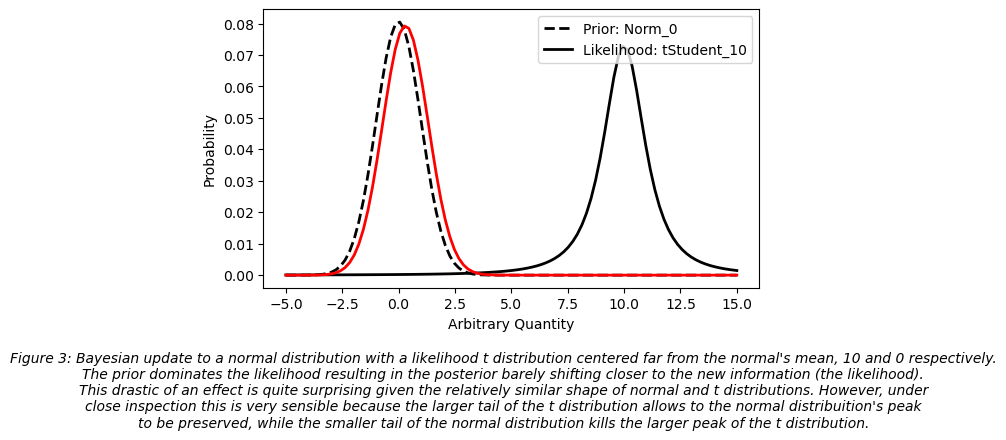

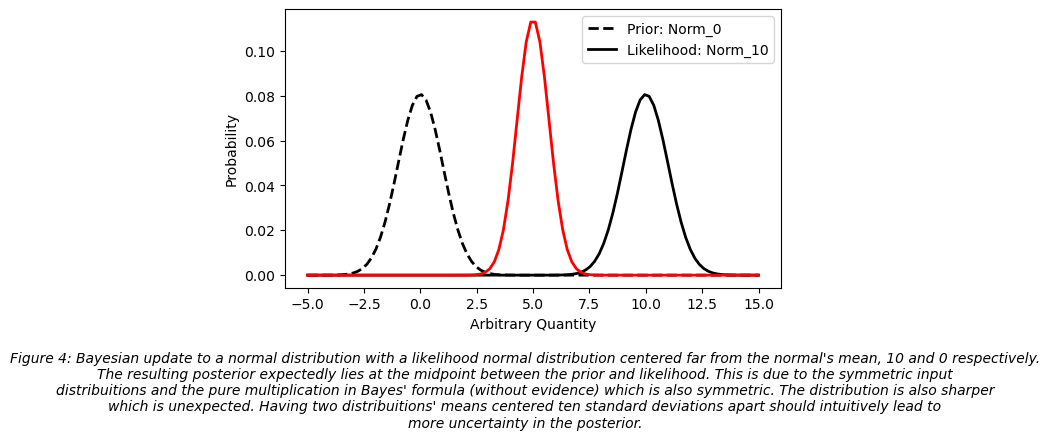

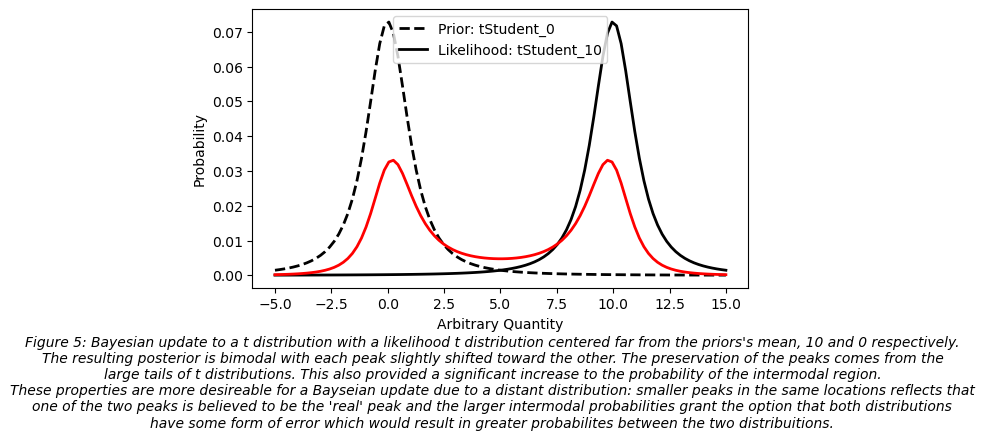

In [4]:
domain = [-5, 15]
N = 100
support = np.linspace(domain[0], domain[1], N)

pdf_list = {
    'Norm_0'      : np.array([support, stats.norm.pdf(support, loc=0, scale=1)]),
    'Norm_10'     : np.array([support, stats.norm.pdf(support, loc=10, scale=1)]),
    'tStudent_0'  : np.array([support, stats.t.pdf(support, 2, loc=0, scale=1)]),
    'tStudent_10' : np.array([support, stats.t.pdf(support, 2, loc=10, scale=1)]),
}
dist_combos = (
    ('Norm_0', 'tStudent_0'),
    ('Norm_0', 'tStudent_10'),
    ('Norm_0', 'Norm_10'),
    ('tStudent_0', 'tStudent_10'),
)

figstrings = [
    (
        "Bayesian update to a normal distribution with a likelihood t distribution centered around the same mean, 0.\n"
        "Because they coincide at the same location, the both contribute to the to sharpening the distribution around 0.\n"
        "This is from the fact that x^2 is positively concave everywhere. Therefore, for probabilities closer to 0 they decrease more\n"
        "then probabilities closer to 1. Thus sharpening the distribution"
    ),
    (
        "Bayesian update to a normal distribution with a likelihood t distribution centered far from the normal's mean, 10 and 0 respectively.\n"
        "The prior dominates the likelihood resulting in the posterior barely shifting closer to the new information (the likelihood).\n"
        "This drastic of an effect is quite surprising given the relatively similar shape of normal and t distributions. However, under\n"
        "close inspection this is very sensible because the larger tail of the t distribution allows to the normal distribuition's peak\n"
        "to be preserved, while the smaller tail of the normal distribution kills the larger peak of the t distribution."
    ),
    (
        "Bayesian update to a normal distribution with a likelihood normal distribution centered far from the normal's mean, 10 and 0 respectively.\n"
        "The resulting posterior expectedly lies at the midpoint between the prior and likelihood. This is due to the symmetric input\n"
        "distribuitions and the pure multiplication in Bayes' formula (without evidence) which is also symmetric. The distribution is also sharper\n"
        "which is unexpected. Having two distribuitions' means centered ten standard deviations apart should intuitively lead to\n"
        "more uncertainty in the posterior."
    ),
    (
        "Bayesian update to a t distribution with a likelihood t distribution centered far from the priors's mean, 10 and 0 respectively.\n"
        "The resulting posterior is bimodal with each peak slightly shifted toward the other. The preservation of the peaks comes from the\n"
        "large tails of t distributions. This also provided a significant increase to the probability of the intermodal region.\n"
        "These properties are more desireable for a Bayseian update due to a distant distribution: smaller peaks in the same locations reflects that\n"
        "one of the two peaks is believed to be the 'real' peak and the larger intermodal probabilities grant the option that both distributions\n"
        "have some form of error which would result in greater probabilites between the two distribuitions."
    ),
]
fignum = 1
for dist0, dist1 in dist_combos:
    fignum += 1
    plt.figure(num=fignum)
    posterior(pdf_list[dist0], pdf_list[dist1])
    plt.legend([f'Prior: {dist0}', f'Likelihood: {dist1}'])
    plt.figtext(.5, 0.01, f'Figure {fignum}: {figstrings[fignum-2]}', ha='center', fontsize=10, style='italic')
    plt.subplots_adjust(bottom=0.3)




